**Quem não tiver presencial, instale**


https://myqlm.github.io/


In [ ]:
pip install qlmaas

<h2> QML no Kuatomu </h2>

**Nome: Mauro Q. Nooblath Neto** 

**Pesquisador do Quantum Industrial Innovation (QuIIN) e LAQCC (Latin American Quantum Computing Center)**

<h3>Nível 1</h3> 


Ao contrário dos **Computadores Convencionais** que utilizam **Bits** para manipular informação, os **Computadores Quânticos** utilizam **Q-Bits**. 

Mas e aí? Qual é a diferença?

**Bit** --> Assume OU **"Estado 0"** ou **"Estado 1"**


<img src="Estados_do_Bit.png" alt="Estados do Bit" width="400" style="display: inline-block; vertical-align: top;"/>

**Q-Bit** --> Assume OU **"Estado 0"** E **"Estado 1"** OU **"Estado 0"** OU **"Estado 1"**

<p float="left">
  <img src="Estados_do_Q_Bit.gif" alt="Estados do Bit" width="300" style="margin-right: 10px;"/>
  <img src="Estados_do_Q_Bit.gif" alt="Estados do Q-Bit" width="300"/>
</p>

Beleza, os Bits podem assumir 0 ou 1. Os Q-Bits podem assumir 0 ou 1 também. Mas... como assim 0 e 1?

Então, isso é uma propriedade dos Sistemas Quânticos. É como se esses sistemas pudessem assumir dois estados ao mesmo tempo. Por exemplo: 

Vamos supor que eu queira ligar a lâmpada dessa sala no interruptor. No caso clássico a lâmpada pode assumir dois estados: "Ligada - Bit 1" ou "Desligada - Bit 0". Por outro lado, no caso Quântico a lâmpada pode assumir o estado "Ligado - Q-Bit 0" ou o estado "Desligado - Q-Bit 1", mas ela também pode assumir um estado de superposição  entre "Ligado" e "Desligada" ao mesmo tempo. 

**Matematicamente**, isso pode ser descrito do seguinte modo:

Um sistema com 1 Q-Bit podemos denotar por $|q_0\rangle$. A notação $| \rangle$  é conhecida como Notação de Dirac ou Notação Bra-ket:

$$|q_0\rangle = \alpha_0|0\rangle + \beta_0|1\rangle \text{ onde }  \text{    } |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \text{   ,   } |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \text{  e } \alpha_0, \beta_0 \in \mathcal{C} \\ \rightarrow |q_0\rangle=  \alpha_0 \begin{bmatrix}1 \\ 0 \end{bmatrix} + \beta_0  \begin{bmatrix}0 \\ 1 \end{bmatrix} \rightarrow  |q_0\rangle= \begin{bmatrix} \alpha_0  \\  \beta_0  \end{bmatrix} \\ \text{ Onde } |\alpha_0|^2 + |\beta_0|^2 = 1  \text{   } \\ $$ 

Como $\alpha_0, \beta_0 \in \mathcal{C}$, note que:

$$\text{Se } \alpha_0 = 1 \text{ e } \beta_0 = 0 \rightarrow |q_0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle \\ \text{ Se } \alpha_0 = 0 \text{ e } \beta_0 = 1 \rightarrow  |q_0\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle \\ $$ Mas também $\alpha_0$ e $\beta_0$ podem assumir qualquer estado valor entre 0 e 1. Contanto que $|\alpha_0|^2 + |\beta_0|^2 = 1$. Quando $\alpha_0 \text{ e } \beta_0 \neq 0$ Dizemos que $|q_0\rangle$ está em um estado superposto



**Graficamente**, isso pode ser descrito do seguinte modo:

$|\alpha_0\rangle = \cos{\frac{\theta}{2}}$ e $|\beta_0\rangle = e^{i\phi}\sin{\frac{\theta}{2}}$ $ \rightarrow \\ |q_0\rangle = \cos{\frac{\theta}{2}}\begin{bmatrix} 1 \\ 0 \end{bmatrix} + e^{i\phi}\sin{\frac{\theta}{2}}\begin{bmatrix} 0 \\ 1 \end{bmatrix} \rightarrow \\ |q_0\rangle = \begin{bmatrix}\cos{\frac{\theta}{2}} \\ e^{i\phi}\sin{\frac{\theta}{2}} \end{bmatrix}$ 

<img src="Bloch_sphere.svg.png" alt="Esfera de Bloch" width="300" style="margin-center: 10px;"/>

A Esfera acima é chamada de Esfera de Bloch.


**Vamos ver como funciona no QLM isso!**



In [ ]:
from qat.lang.AQASM import Program, H
from qiskit.visualization import plot_bloch_multivector

#===============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
from qat.qpus import get_default_qpu
qpu = get_default_qpu()# Define o simulador quântico
job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submete o processo para a QPU
for sample in result:
    print("|q_0> =", sample.amplitude, sample.state)

plot_bloch_multivector(result.statevector) # Mostra a Esfera de Bloch na tela

Note que esse estado $|q_0\rangle = |0\rangle$ é o estado em que o circuito quântico inicializa. 

Mas como deixar o qubit em um estado superposto? 

Para fazermos isso é só aplicar um operador (ou porta) no nosso estado que deixa-o superposto. Existem muitas formas de superposição. Cada valor assumido pelos coeficientes $\alpha_0$ e $\beta_0$ é uma forma de superposição. Mas vamos aplicar uma porta que deixa o Q-Bit $|q_0\rangle$ em um estado superposto tal que $\alpha_0 = \beta_0 = \frac{1}{\sqrt{2}}$. O nome dessa porta é Hadamard (H).

O Código abaixo simula um sistema de 1 Q-Bit e seus coeficientes $\alpha_0$ e $\beta_0$ podem ser variados, preservando a condição de que $|\alpha_0|^2 + |\beta_0|^2 = 1$

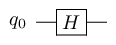

|q_0> = (0.7071067811865475+0j) |0>
|q_0> = (0.7071067811865475+0j) |1>


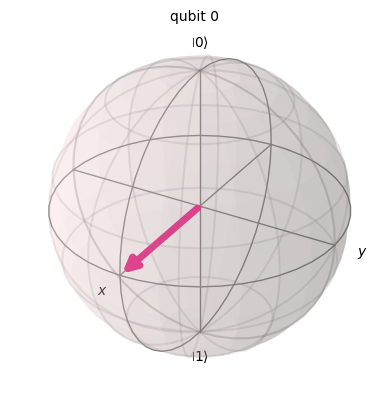

In [1]:
from qat.lang.AQASM import Program, H
from qiskit.visualization import plot_bloch_multivector

#===============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================

H(QBits[0]) # Adiciona uma Hadamard no Qubit |q0>
#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
from qat.qpus import get_default_qpu
qpu = get_default_qpu()# Define o simulador quântico
job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submete o processo para a QPU
for sample in result:
    print("|q_0> =", sample.amplitude, sample.state)

plot_bloch_multivector(result.statevector) # Mostra a Esfera de Bloch na tela


Note que o $q_0$ assumiu um estado superposto onde $\alpha_0 = \beta_0 = \frac{1}{\sqrt{2}} = 0.707$ 

As **portas quânticas** são utilizadas para **modificar os estados dos Q-Bits** e assim conseguimos, baseado em uma lógica, **desenvolver algoritmos** com isso. Essas **portas** podem ser **descritas matematicamente** como **matrizes** que ao serem **multiplicadas pelo vetor que representa um respectivo estado do sistema Quântico** realiza modificações no estado desse sistema. Basicamente o processo matemático é o seguinte:

$$\mathcal{O}|q_0\rangle = |q_0'\rangle \text{ Em que } \mathcal{O} \text{ é um operador matricial} \\ \text{Se } \mathcal{O} \text{ for uma Hadamard então } \mathcal{H}|q_0\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \rightarrow \\ \mathcal{H}|q_0\rangle = \frac{1}{\sqrt{2}}\bigg(\begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \bigg) \rightarrow \\ \mathcal{H}|q_0\rangle =  \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)  $$  

**Geometricamente**, o que essas portas fazem é **rotacionar o vetor de estado, Q-Bit, ao redor de um respectivo eixo na esfera de Bloch**. 

E se no início do circuito, o $|q_0\rangle = |1\rangle$ ao invés de ser $|0\rangle$. 

A porta **X** faz com que o Q-Bit mude o estado de $|0\rangle$ para $|1\rangle$. Essa porta tem a seguinte matriz

$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

Aplicando-a em $|q_0\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ Teremos:

$$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle $$






**Exercício 1: Complete o código abaixo colocando uma porta X antes da Hadamard e perceba como fica o resultado**

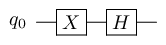

|q_0> = (0.7071067811865475+0j) |0>
|q_0> = (-0.7071067811865475+0j) |1>


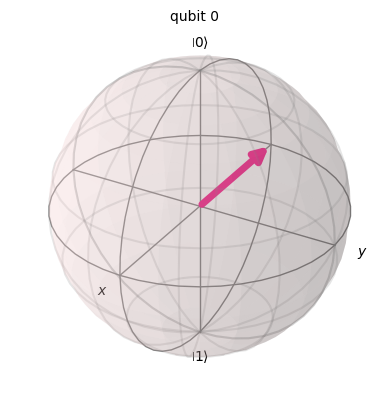

In [4]:
from qat.lang.AQASM import Program, H, X 
from qiskit.visualization import plot_bloch_multivector

#===============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================
'''
Complete aqui 
'''

H(QBits[0]) # Adiciona uma Hadamard no Qubit |q0>
#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
from qat.qpus import get_default_qpu
qpu = get_default_qpu()# Define o simulador quântico
job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submete o processo para a QPU
for sample in result:
    print("|q_0> =", sample.amplitude, sample.state)

plot_bloch_multivector(result.statevector) # Mostra a Esfera de Bloch na tela


Um sistema quântico ou Q-Bit, pode assumir um estado de superposição e isso é importante, pois conseguimos codificar informações na amplitude do estado, por exemplo. E, com isso, tentar conseguir algum ganho computacional. Ao medir o Q-Bit, este vai colapsar para um dos estados que ele pode assumir. **Por exemplo, o Q-Bit $|q_0\rangle$ no estado superposto que mostramos mais acima.**

$$|q_0\rangle = \frac{1}{\sqrt{2}} \bigg(|0\rangle + |1\rangle\bigg)$$

**Ao medir o Q-Bit nesse estado, ele tem $\bigg|\frac{1}{\sqrt{2}}\bigg|^2$ de probabilidade de colapsar para $|0\rangle$ ou $\bigg|\frac{1}{\sqrt{2}}\bigg|^2$ de probabilidade para colapsar para $|1\rangle$.** **Observe o uso da notação $| |$ que é a notação de módulo.** **O módulo quadrático calcula a probabilidade que o estado tem de assumir, depois de uma medida o estado $|0\rangle$ ou $|1\rangle$.** Portanto, **perceba que depois da medida de um sistema quântico, o resultado da medida é clássico**. 

**Como investigar iss no QLM?** 

É simples é só escrever, no final do algoritmo, antes de transformar o *qProg* em um circuto para medir,  **a função *qProg.measure()*** e informar dentro do argumento o Q-Bit que se quer medir.

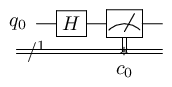

|q_0> = (1+0j) |1>


In [5]:
from qat.lang.AQASM import Program, H, X 
from qiskit.visualization import plot_histogram

#===============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================
H(QBits[0]) # Adiciona uma Hadamard no Qubit |q0>
qProg.measure(QBits[0]) # Medida no circuito
#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
from qat.qpus import get_default_qpu
qpu = get_default_qpu()# Define o simulador quântico
job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submete o processo para a QPU
for sample in result:
    print("|q_0> =", sample.amplitude, sample.state)
    


**Note que se ficarmos medindo várias vezes conseguiremos saber qual a distribuição probabilística que esse Q-Bit pode assumir. Quanto maior a quantidade de vezes, mais certeza teremos na distribuição que aquele determinado Q-Bit ao ficar sendo medido várias vezes assume.**

**Exercício 2: Modifique o tamanho da variável N em [50, 450, 750, 1000, 1250]**

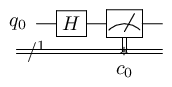

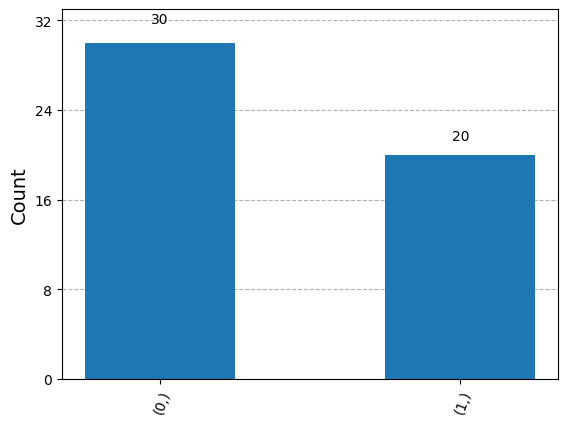

In [6]:
from qat.lang.AQASM import Program, H, X 
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import pandas as pd


#===============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================
H(QBits[0]) # Adiciona uma Hadamard no Qubit |q0>
qProg.measure(QBits[0]) # Medida no circuito
#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
N = 50 

from qat.qpus import get_default_qpu

results = []
for i in range(N):
    qpu = get_default_qpu()# Define o simulador quântico
    job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
    result = qpu.submit(job) # Submete o processo para a QPU
    for sample in result:
        results.append(np.int(sample.state.value[0]))

plot_histogram(dict(pd.DataFrame(results).value_counts()))

### Nível 2

**No *Nível 1* apredemos a definir um Q-Bit, superpor, medir e mostrar a distribuição de probabilidade que um determinado estado assumido pelo Q-Bit pode gerar.**

Agora vamos estudar o **último conjunto de portas de 1 Qubit neste Hands-on** que são as **portas parametrizadas.** 

Note que a Hadamard faz com o que o Q-Bit assuma o estado superposto $|q_0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$. Portanto, esse estado só tem $50\%$ de probabilidade de colapsar para $|0\rangle$ e $50\%$ de probabilidade de colapsar para $|1\rangle$. Para explorarmos outros estados, podemos utilizar as portas parametrizadas, que podem ser RX, RY, RZ e PH.

Para visualizar o efeito dessas portas em um sistema de 1 Q-Bit. Vamos voltar à Esfera de Bloch

<img src="Bloch_sphere.svg.png" alt="Esfera de Bloch" width="300" style="margin-center: 10px;"/>



**Se aplicarmos a $R_x\bigg(\frac{\pi}{180}\bigg)$, o vetor vai rotacionar a partir do seu estado inicial $\frac{\pi}{180}$ ao redor do eixo X. A mesma coisa para  Y e Z.** Por exemplo, se o estado inicial estiver em $|0\rangle$, como o estado de $|q_0\rangle$ acima e aplicarmos a H, ela nada mais faz que rotacionar o estado do Q-BIT ao redor do eixo Y em um ângulo de $\frac{\pi}{2}$. **Observe que ao aplicar a porta $R_{y}(\frac{\pi}{2})$ o estado final será o mesmo da Hadarmad antes das medidas.**

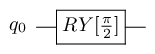

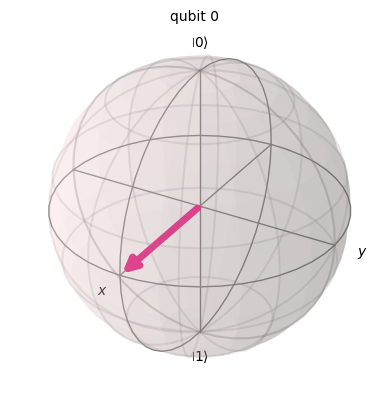

In [7]:
from qat.lang.AQASM import Program, H, RY
from qiskit.visualization import plot_bloch_multivector
from qat.qpus import get_default_qpu
import numpy as np
from numpy import pi
import pandas as pd
#==============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================
RY(pi/2)(QBits[0])

#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
results = []

qpu = get_default_qpu()# Define o simulador quântico
job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submete o processo para a QPU
plot_bloch_multivector(result.statevector)



**Exercício 3: Dado que o estado está assumindo a superposição em $|q_0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$, ou seja, o vetor de estado aponta para o estado localizado no eixo X positivo da esfera de Bloch. Vamos tentar chegar no eixo Z negativo, fazendo o seguinte percurso pela esfera de Bloch.** 
1) Rotacione ao redor do Eixo Z até o Eixo X Negativo. 
2) Rotacione ao redor do Eixo Y para chegar no Eixo Z Negativo.
3) Rotacione ao redor do Eixo X para chegar no Eixo Y Negativo
3) Imprima na Tela o Resultado


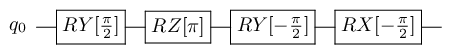

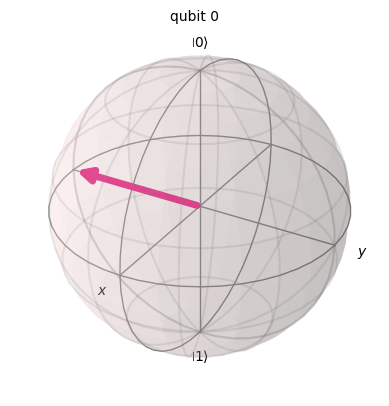

In [8]:
from qat.lang.AQASM import Program, H, RY, RZ, RX
from qiskit.visualization import plot_bloch_multivector
from qat.qpus import get_default_qpu
import numpy as np
from numpy import pi
import pandas as pd
#==============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 1 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================
RY(pi/2)(QBits[0])
'''
Passo 1 --->
Passo 2 --->
Passo 3 ---> 
'''


#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================
results = []

qpu = get_default_qpu()# Define o simulador quântico
job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submete o processo para a QPU

'''
Passo 4 ---> plot_bloch_multivector(Descomente aqui e defina o vetor de estado para imprimir a Esfera de Bloch )
'''


Uma vez que já vimos sistemas só com um Q-Bit, vamos trabalhar com sistemas de dois ou mais Q-Bits. Matematicamente, esses Q-Bits são descritos por produtos tensoriais. Vamos lá.

Seja um sistema com 2 Q-Bits, por exemplo $|q_0\rangle = \alpha_0|0\rangle + \beta_0|1\rangle$ e $|q_1\rangle = \alpha_1|0\rangle + \beta_1|1\rangle$.**Matricialmente, fica $|q_0\rangle = \begin{bmatrix} \alpha_0 \\ \beta_0  \end{bmatrix}$ e $|q_1\rangle = \begin{bmatrix} \alpha_1 \\ \beta_1 \end{bmatrix}$. Denotamos $|q_1\rangle \otimes |q_0\rangle$ como o produto tensorial de $|q_1\rangle$ por $|q_0\rangle$ e podemos simplificar a notação dizendo que  $|q_1\rangle \otimes |q_0\rangle = |q_1q_0\rangle$.  E o resultado disso fica:**

$|q_1q_0\rangle = \alpha_0\alpha_1 \begin{bmatrix} \alpha_1 \begin{bmatrix} \alpha_0 \\ \beta_0\end{bmatrix} \\ 
\beta_1 \begin{bmatrix} \alpha_0 \\ \beta_0 \end{bmatrix}\end{bmatrix} = \begin{bmatrix} \alpha_1\alpha_0 \\ \alpha_1\beta_0 \\ \beta_1\alpha_0 \\ \beta_1\beta_0 \end{bmatrix} \rightarrow \\ |q_1q_0\rangle =  \begin{bmatrix} \alpha_1\alpha_0 \\ \alpha_1\beta_0 \\ \beta_1\alpha_0 \\ \beta_1\beta_0  \end{bmatrix} =  
\alpha_1\alpha_0 \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + \alpha_1\beta_0 \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}  + \beta_1\alpha_0 \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} + \beta_1\beta_0 \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = \alpha_1\alpha_0|00\rangle +  \alpha_1\beta_0|01\rangle + \beta_1\alpha_0|10\rangle + \beta_1\beta_0|11\rangle \rightarrow \\ |q_1q_0\rangle = \alpha_1\alpha_0|00\rangle +  \alpha_1\beta_0|01\rangle + \beta_1\alpha_0|10\rangle + \beta_1\beta_0|11\rangle $

**As matrizes relacionadas às portas para um sistema de 2 Q-Bits, seguem a mesma lógica. Para achá-las é só fazer um produto tensorial entre ambas. Por exemplo, observe o circuito implementado abaixo que contém duas Hadamards.**



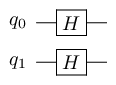

In [9]:
from qat.lang.AQASM import Program, H

qProg = Program()
num_QBits = 2
qBits = qProg.qalloc(num_QBits)
H(qBits[0])
H(qBits[1])
circuit = qProg.to_circ()
circuit.display()


Observe que no circuito acima temos 2 Q-Bits $|q_0\rangle$ e $|q_1\rangle$. Lembre que denotaremos, matematicamente, como $|q_1q_0\rangle$. Note que no circuito acima temos: $H|q_0\rangle$ e $H|q_1\rangle$. Ou seja:

$H|0\rangle_{q_1} \otimes H|0\rangle_{q_0} = \bigg(\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1  \\ 1 & -1\end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} \bigg) \otimes \bigg( \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1  \\ 1 & -1\end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}\bigg) = \bigg(\frac{1}{\sqrt{2}} \begin{bmatrix}1\\1\end{bmatrix}\bigg) \otimes \bigg(\frac{1}{\sqrt{2}} \begin{bmatrix}1\\1\end{bmatrix}\bigg) = \bigg(\frac{1}{2} \begin{bmatrix} 1 \begin{bmatrix} 1 \\ 1 \end{bmatrix} \\ 1 \begin{bmatrix} 1 \\ 1 \end{bmatrix}\end{bmatrix}\bigg) = \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}$ 

Mas também podemos fazer do seguinte modo:

$$H|0\rangle_{q_1} \otimes H|0\rangle_{q_0} = (H\otimes H) |00\rangle_{q_1q_0}\\ 
(H\otimes H) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1  \\ 1 & -1\end{bmatrix} \otimes  \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1  \\ 1 & -1\end{bmatrix} \\ \frac{1}{2} \begin{bmatrix} 1\begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix} & 1\begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix}   \\ 1\begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix} & -1\begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix}\end{bmatrix} = \frac{1}{2} \begin{bmatrix} \begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix} & \begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix} \\ \begin{bmatrix} 1  & 1  \\ 1 & -1\end{bmatrix} & \begin{bmatrix} -1  & -1  \\ -1 & 1\end{bmatrix}   \end{bmatrix} = \frac{1}{2}\begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1  \end{bmatrix} \\ \therefore H \otimes H  = H^2 =  \frac{1}{2}\begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1  \end{bmatrix}  $$

$$|00\rangle_{q_1q_0} = \begin{bmatrix} 1 \\ 0 \\ 0\\0 \end{bmatrix} \\ \therefore H^2|00\rangle = \frac{1}{2}\begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1  \end{bmatrix}  \begin{bmatrix} 1 \\ 0 \\ 0\\0 \end{bmatrix}  = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1\end{bmatrix} $$




**Exercício 4: Implementando isso no QLM podemos ver os estados formados com 2 qubits e a aplicação da Hadamard para 2 Q-Bits. a) Defina um N ótimo para visualizar a distribuição de medidas do estado resultante da aplicação da Porta HADAMARD b)Adapte o código código abaixo para visualizar como fica a esfera de Bloch para um sistema de 2 QuBits**


In [ ]:
from qat.lang.AQASM import Program, H, X 
from qiskit.visualization import plot_bloch_multivector

#===============================================================Processo de Geração ========================================================================
qProg = Program() # Essa classe fornece uma interfarce que constrói e gera um Objeto do tipo circuito
num_QBits = 2 #Define a QUANTIDADES DE Q-BITS
QBits = qProg.qalloc(num_QBits) #Aloca a QUANTIDADE DE Q-BITS no interface em que criamos
#===============================================================Processo de adição de portas=============================================================
H(QBits[0]) # Adiciona uma Hadamard no Qubit |q0>
H(QBits[1]) # Adiciona uma Hadamard no Qubit |q1>
qProg.measure(QBits[0]) # Medida no circuito
qProg.measure(QBits[1]) # Medida no circuito
#=========================================================================================================================================================
circuit = qProg.to_circ() #Transforma em um circuito quântico
circuit.display() # Mostra o Circuito na Tela
#=================================================================================== Processo de Medida ===========================================

'''
Defina o N ótimo
'''

results = []
for i in range(N):
    qpu = get_default_qpu()# Define o simulador quântico
    job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
    result = qpu.submit(job) # Submete o processo para a QPU
    for sample in result:
        results.append(np.int(sample.state.value[0]))

plot_histogram(dict(pd.DataFrame(results).value_counts()))



In [ ]:
"""
Escreva o código aqui
"""

**Um outro grupo de portas muito importante são as portas de controle. Dentre elas destacam as portar Not-Control(CNOT), SWAP, Not-Not-Control (CCNOT), Phase_Control e etc.  A porta CNOT, por exemplo, possui a seguinte matriz:**

$$CNOT =  \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0
                  \end{bmatrix}$$
                  
**Perceba que temos uma matriz 2x2 na parte superior esquerda que é a identidade I e uma matriz X na parte inferior direita.** 

**Ok! Mas como isso se comporta ao ser aplicado em um sistema com 2 Q-Bits?**

Seja $|00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$. Então:

$$CNOT|00\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0
                  \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}  = \begin{bmatrix} 1 \\ 0 \\ 0\\ 0\end{bmatrix} = |00\rangle \\ CNOT|01\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0
                  \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}  = \begin{bmatrix} 0 \\ 1 \\ 0\\ 0\end{bmatrix} = |01\rangle \\ CNOT|10\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0
                  \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}  = \begin{bmatrix} 0 \\ 0 \\ 0\\ 1\end{bmatrix} = |11\rangle \\ CNOT|11\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0
                  \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}  = \begin{bmatrix} 0 \\ 0 \\ 1\\ 0\end{bmatrix} = |10\rangle $$
                  
                  
                
                  


A **operação CNOT**  atua em dois qubits: **um qubit é o qubit de controle e o outro é o qubit alvo.** A regra de funcionamento da CNOT é a seguinte:

- **Qubit de Controle:** Se o qubit de controle estiver no estado |1⟩, a operação é aplicada ao qubit alvo.
- **Qubit Alvo:** A operação que ocorre no qubit alvo é uma operação NOT, que transforma |0⟩ em |1⟩ e |1⟩ em |0⟩.

**Abaixo segue uma inicialização do sistema de dois Q-Bits para o caso $CNOT|01\rangle = |01\rangle$. Note que aqui, o controle é 0 e o alvo é 1.**

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#==========================================================================================
X(qBits[1]) # Definindo o estado |01> adicionando uma Not no Qubit menos significativo "|q1>" 
CNOT(qBits[0], qBits[1]) # Adicionando a CNOT
circuit = qProg.to_circ()
#==========================================================================================


results = []
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))

circuit.display()
print(result.statevector)


**Exercício 5: Complete o código abaixo de tal forma que se implemente cada caso desse e repare como fica as amplitudes dos estados para cada um dos casos. O primeiro estado está demonstrado no código acima**

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== Implemente o estado |00> ===================================




#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))

circuit.display()
print(result.statevector)


In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== Implemente o estado |10> ===================================




#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))

circuit.display()
print(result.statevector)


In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== Implemente o estado |11> ===================================




#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))

circuit.display()
print(result.statevector)


Uma outra porta interessante é a porta de **Fase Z**. Essa porta só vai atuar no Qubit se ele estiver no estado 1. É uma porta de 1 Q-bit, todavia existe a versão dela controlada no caso para um sistema de 2 Q-Bits. A matriz da porta Z é dada pela seguinte matriz:

$$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \\ Z|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1\\ 0 \end{bmatrix} = \begin{bmatrix} 1\\ 0 \end{bmatrix} \\ Z|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix} = -\begin{bmatrix} 0 \\ 1 \end{bmatrix}  = -|1\rangle \\ \therefore Z|0\rangle = |0\rangle \\ Z|1\rangle = -|1\rangle$$.

Logo a porta Z controlada é: 

$$CZ = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                       0 & 1 & 0 & 0 \\
                       0 & 0 & 1 & 0 \\
                       0 & 0 & 0 & -1 \\
                       \end{bmatrix} \\
                       CZ|00\rangle = |00\rangle \\
                       CZ|01\rangle = |01\rangle \\
                       CZ|10\rangle = |10\rangle \\
                       CZ|11\rangle = -|11\rangle \\
                       $$
                       
                       
                       



In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT, CSIGN 
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#======================================================Para o estado |00>===================================


CSIGN(qBits[0], qBits[1])

#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))
    print(sample.state)
    print(sample.amplitude)
circuit.display()

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT, CSIGN 
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== IMPLEMENTE PARA O ESTADO |11>===================================


CSIGN(qBits[0], qBits[1])

#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))
    print(sample.state)
    print(sample.amplitude)
circuit.display()

<h3> Nível 3 </h3>

**Exercício 7: No código abaixo, adicione as portas necessárias para implementar o estado $|11\rangle$ e ver a porta Z atuando**

Existem estados altamente emaranhados, chamados de Estados de Bell. Esses estados são:

$$|\psi_0\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} \\ 
|\psi_1\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}} \\ 
|\psi_2\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}\\ 
|\psi_3\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}  $$



O código abaixo mostra a implementação de um desses estados

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)


H(qBits[0])
CNOT(qBits[0], qBits[1])


#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))
    print(sample.state)
    print(sample.amplitude)
circuit.display()



Matematicamente, podemos fazer:

$$|q_0\rangle \otimes |q_1\rangle = H|q_0\rangle \otimes |q_1\rangle =\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1  \\ 0\end{bmatrix} \otimes \begin{bmatrix} 1  \\ 0\end{bmatrix}  \\ = \frac{1}{\sqrt{2}}\begin{bmatrix} 1  \\ 1\end{bmatrix} \otimes \begin{bmatrix} 1  \\ 0\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \begin{bmatrix} 1  \\ 0\end{bmatrix} \\ 1\begin{bmatrix} 1  \\ 0\end{bmatrix}\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0  \\ 1\\ 0 \end{bmatrix} \\ \therefore |q_0\rangle \otimes |q_1\rangle  =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0  \\ 1\\ 0 \end{bmatrix}$$

Agora, aplicando a CNOT. Temos:

$CNOT|q_0\rangle \otimes |q_1\rangle  = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 
                  0 & 1 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0
                  \end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0  \\ 1\\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 
                  \end{bmatrix} = \frac{|00\rangle + |11\rangle}{\sqrt{2}}  $

**Exercício 6: No código abaixo, adicione as portas necessárias para gerar os outros estados de Bell**

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== Implemente o estado (|00> - |11>)/raiz(2) ===================================


#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))
    print(sample.state)
    print(sample.amplitude)
circuit.display()

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== Implemente o estado (|01> + |10>)/raiz(2) ===================================


#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))
    print(sample.state)
    print(sample.amplitude)
circuit.display()

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

#====================================================== Implemente o estado (|01> - |10>)/raiz(2) ===================================


#============================================================================================================

circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    results.append(np.real(sample.state.value[0]))
    print(sample.state)
    print(sample.amplitude)
circuit.display()

**ALGORITMO DE GROVER**

O Algoritmo de Grover tem a finalidade de encontrar algum elementos em um conjunto desordenado em um tempo computacional $\mathcal{O}(\sqrt{N})$ iterações, onde **N** é a quantidade de elementos que o conjunto possui. Este algoritmo utiliza o algoritmo de amplificação de amplitude que é um algoritmo quântico de propósito geral ou sub-rotina que pode ser usado para obter aceleração quântica em vários algoritmos clássicos. 



<img src="Grover.gif" alt="Esfera de Bloch" width="600" style="margin-center: 50px;"/>





In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT, CSIGN, CCNOT 
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 2
qBits = qProg.qalloc(num_QBits)

for i in range(num_QBits):
    H(qBits[i])

#=================Marca o estado |01> 
for t in range(int(np.sqrt(2**num_QBits))):
    X(qBits[1])
    X(qBits[0])    
    H(qBits[-1])
    CNOT(qBits[0], qBits[1])
    H(qBits[-1])
    X(qBits[0])
    X(qBits[1])
    
    #X(qBits[1])
    X(qBits[0])    
    H(qBits[-1])
    CNOT(qBits[0], qBits[1])
    H(qBits[-1])
    X(qBits[0])
    #X(qBits[1])



    for i in range(num_QBits):
        H(qBits[i])
        X(qBits[i])

    H(qBits[-1])
    CNOT(qBits[0], qBits[1])
    H(qBits[-1])

    for i in range(num_QBits):
        X(qBits[i])
        H(qBits[i])


    for i in range(num_QBits):
        qProg.measure(qBits[i])


    circuit = qProg.to_circ()
    results = []
    N = 500
    for i in range(N):
        qpu = get_default_qpu()# Define o simulador quântico
        job = circuit.to_job() # Transforma o circuito em um "processo" para a QPU
        result = qpu.submit(job) # Submete o processo para a QPU
        for sample in result:
            results.append(np.int(sample.state.value[0]))

plot_histogram(dict(pd.DataFrame(results).value_counts()))
    
    


**Exercício 8: No código abaixo, ache os estados $|000\rangle$, $|001\rangle$ ,$|101\rangle$ e $|111\rangle$**

In [ ]:
from qat.lang.AQASM import Program, H, X, CNOT, CSIGN, CCNOT 
from qiskit.visualization import plot_histogram
from qat.qpus import get_default_qpu
import pandas as pd
import numpy as np

qProg = Program()

num_QBits = 3
qBits = qProg.qalloc(num_QBits)

for i in range(num_QBits):
    H(qBits[i])

for t in range(int(np.sqrt(2**num_QBits))):   
    
    #=======================Escreva o código aqui do estado================
    
    
    
    
    #===========================================================================



    for i in range(num_QBits):
        H(qBits[i])
        X(qBits[i])

    H(qBits[-1])
    CCNOT(qBits[0], qBits[1], qBits[2])
    H(qBits[-1])

    for i in range(num_QBits):
        X(qBits[i])
        H(qBits[i])



qProg.measure(qBits[i] for i in range(num_QBits))


circuit = qProg.to_circ()
qpu = get_default_qpu() # Definindo o simulador quântico
job = circuit.to_job() # Transformando o circuito em um "processo" para a QPU
result = qpu.submit(job) # Submetendo o processo para a QPU
for sample in result:
    print(sample.state)
    print(sample.amplitude)
circuit.display()